In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
# to visualise al the columns in the dataframe
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir(r'C:\Users\Downloads\bank-additional\bank-additional')

In [3]:
#loading data into python
data=pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Feature Engineearing

In [4]:
#event rate
round(data.y.value_counts()/len(data),2)

no     0.89
yes    0.11
Name: y, dtype: float64

In [5]:
#checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#split data into train and test
df=data.drop('y', axis=1)
y=data['y'].map({'yes':1,'no':0})
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.30, random_state=42)

#categorical variable

In [7]:
#categorical variable
X_train_cat=X_train.loc[:,X_train.dtypes==np.object]
X_test_cat=X_test.loc[:,X_test.dtypes==np.object]
#data_cat=data_cat.drop('y', axis=1)
X_train_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
39075,admin.,married,university.degree,no,no,no,cellular,dec,mon,failure
34855,technician,single,university.degree,no,no,no,telephone,may,fri,nonexistent
7107,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,nonexistent
31614,services,married,university.degree,no,no,no,cellular,may,thu,failure
34878,admin.,single,high.school,no,no,no,cellular,may,fri,nonexistent


In [8]:
#count of unique categories in categorical variable 
for i in X_train_cat.columns:
    print('categories distribution for {}:{}'.format((i),X_train_cat[i].nunique()))
    
          

categories distribution for job:12
categories distribution for marital:4
categories distribution for education:8
categories distribution for default:3
categories distribution for housing:3
categories distribution for loan:3
categories distribution for contact:2
categories distribution for month:10
categories distribution for day_of_week:5
categories distribution for poutcome:3


In [9]:
#percentage distribution of categories in each variable 
for i in X_train_cat.columns:
    print('categories distribution for {}:{}'.format((i),(round((X_train_cat[i].value_counts())*100/len(X_train_cat),2))))

categories distribution for job:admin.           25.45
blue-collar      22.55
technician       16.15
services          9.74
management        6.99
retired           4.09
self-employed     3.52
entrepreneur      3.43
housemaid         2.62
unemployed        2.43
student           2.21
unknown           0.82
Name: job, dtype: float64
categories distribution for marital:married     60.24
single      28.40
divorced    11.18
unknown      0.18
Name: marital, dtype: float64
categories distribution for education:university.degree      29.59
high.school            23.30
basic.9y               14.45
professional.course    12.65
basic.4y               10.11
basic.6y                5.57
unknown                 4.29
illiterate              0.04
Name: education, dtype: float64
categories distribution for default:no         79.25
unknown    20.74
yes         0.01
Name: default, dtype: float64
categories distribution for housing:yes        52.36
no         45.16
unknown     2.48
Name: housing, dtype: 

In [10]:
# we create and train the encoder
#one hot encoding of categorical variable

encoder = OneHotEncoder(categories='auto',
                       drop=None, # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels

encoder.fit(X_train_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [11]:
X_train_cat = encoder.transform(X_train_cat)
X_train_cat=pd.DataFrame(X_train_cat)
X_train_cat.columns = encoder.get_feature_names()
X_train_cat.head()

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x0_unknown,x1_divorced,x1_married,x1_single,x1_unknown,x2_basic.4y,x2_basic.6y,x2_basic.9y,x2_high.school,x2_illiterate,x2_professional.course,x2_university.degree,x2_unknown,x3_no,x3_unknown,x3_yes,x4_no,x4_unknown,x4_yes,x5_no,x5_unknown,x5_yes,x6_cellular,x6_telephone,x7_apr,x7_aug,x7_dec,x7_jul,x7_jun,x7_mar,x7_may,x7_nov,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X_test_cat = encoder.transform(X_test_cat)
X_test_cat=pd.DataFrame(X_test_cat)
X_test_cat.columns = encoder.get_feature_names()


#continous variables

In [13]:
#continous varaibales
X_train_num=X_train.loc[:,X_train.dtypes==np.int64]
X_train_num

,age,duration,campaign,pdays,previous
39075,29,77,3,999,1
34855,29,12,4,999,0
7107,45,277,2,999,0
31614,34,70,1,999,1
34878,32,1181,9,999,0
...,...,...,...,...,...
6265,58,427,2,999,0
11284,37,288,1,999,0
38158,35,194,1,4,1
860,40,295,2,999,0


In [14]:
X_train_float=X_train.loc[:, X_train.dtypes==np.float64]
X_train_float

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,-3.0,92.713,-33.0,0.709,5023.5
34855,-1.8,92.893,-46.2,1.250,5099.1
7107,1.1,93.994,-36.4,4.860,5191.0
31614,-1.8,92.893,-46.2,1.327,5099.1
34878,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...
6265,1.1,93.994,-36.4,4.857,5191.0
11284,1.4,94.465,-41.8,4.961,5228.1
38158,-3.4,92.431,-26.9,0.754,5017.5
860,1.1,93.994,-36.4,4.856,5191.0


In [19]:
X_train_numeric=pd.concat([X_train_num,X_train_float], axis=1)
X_train_numeric

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,29,77,3,999,1,-3.0,92.713,-33.0,0.709,5023.5
34855,29,12,4,999,0,-1.8,92.893,-46.2,1.250,5099.1
7107,45,277,2,999,0,1.1,93.994,-36.4,4.860,5191.0
31614,34,70,1,999,1,-1.8,92.893,-46.2,1.327,5099.1
34878,32,1181,9,999,0,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...
6265,58,427,2,999,0,1.1,93.994,-36.4,4.857,5191.0
11284,37,288,1,999,0,1.4,94.465,-41.8,4.961,5228.1
38158,35,194,1,4,1,-3.4,92.431,-26.9,0.754,5017.5
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0


In [16]:
X_test_num=X_test.loc[:,X_test.dtypes==np.int64]
X_test_float=X_test.loc[:, X_test.dtypes==np.float64]
X_test_numeric=pd.concat([X_test_num,X_test_float], axis=1)

In [17]:
#correlation between numerical variables
cor= X_train_numeric.corr(method='pearson')
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.003741,0.008758,-0.036666,0.027094,-0.000595,0.003682,0.126321,0.010074,-0.018042
duration,-0.003741,1.000000,-0.072445,-0.052064,0.020699,-0.029512,0.006035,-0.008210,-0.035028,-0.047273
campaign,0.008758,-0.072445,1.000000,0.050604,-0.077222,0.154406,0.128875,-0.013231,0.138310,0.147386
pdays,-0.036666,-0.052064,0.050604,1.000000,-0.581918,0.267267,0.069794,-0.089671,0.294894,0.373829
previous,0.027094,0.020699,-0.077222,-0.581918,1.000000,-0.418479,-0.199327,-0.054665,-0.452338,-0.498962
emp.var.rate,-0.000595,-0.029512,0.154406,0.267267,-0.418479,1.000000,0.772732,0.191490,0.972088,0.906417
cons.price.idx,0.003682,0.006035,0.128875,0.069794,-0.199327,0.772732,1.000000,0.052215,0.684425,0.517057
cons.conf.idx,0.126321,-0.008210,-0.013231,-0.089671,-0.054665,0.191490,0.052215,1.000000,0.273833,0.098496
euribor3m,0.010074,-0.035028,0.138310,0.294894,-0.452338,0.972088,0.684425,0.273833,1.000000,0.945113
nr.employed,-0.018042,-0.047273,0.147386,0.373829,-0.498962,0.906417,0.517057,0.098496,0.945113,1.000000


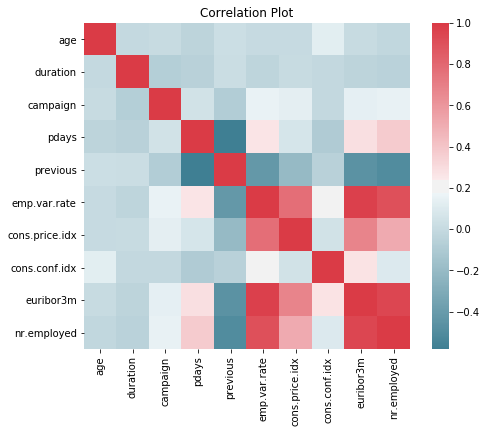

In [18]:
#correlation plot
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [20]:
#removing highly correlated features 
X_train_numeric_new=X_train_numeric.drop(['emp.var.rate','euribor3m'],axis=1)
X_test_numeric_new=X_test_numeric.drop(['emp.var.rate','euribor3m'],axis=1)
print(X_train_cat.shape)
print(X_train_numeric_new.shape)

(28831, 53)
(28831, 8)


In [21]:
X_train_cat.reset_index(drop=True, inplace=True)
X_train_numeric_new.reset_index(drop=True, inplace=True)
X_train_new=pd.concat([X_train_cat,X_train_numeric_new],axis=1)
X_train_new.head()

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,x0_unemployed,x0_unknown,x1_divorced,x1_married,x1_single,x1_unknown,x2_basic.4y,x2_basic.6y,x2_basic.9y,x2_high.school,x2_illiterate,x2_professional.course,x2_university.degree,x2_unknown,x3_no,x3_unknown,x3_yes,x4_no,x4_unknown,x4_yes,x5_no,x5_unknown,x5_yes,x6_cellular,x6_telephone,x7_apr,x7_aug,x7_dec,x7_jul,x7_jun,x7_mar,x7_may,x7_nov,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,29,77,3,999,1,92.713,-33.0,5023.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29,12,4,999,0,92.893,-46.2,5099.1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,45,277,2,999,0,93.994,-36.4,5191.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,34,70,1,999,1,92.893,-46.2,5099.1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32,1181,9,999,0,92.893,-46.2,5099.1


In [22]:
X_test_cat.reset_index(drop=True, inplace=True)
X_test_numeric_new.reset_index(drop=True, inplace=True)
X_test_new=pd.concat([X_test_cat,X_test_numeric_new],axis=1)

In [24]:
#Removing Quasi-Constant Features Using Variance Threshold
constant_filter = VarianceThreshold(threshold=0.05)
constant_filter.fit(X_train_new)

len(X_train_new.columns[constant_filter.get_support()])

constant_columns = [column for column in X_train_new.columns
                    if column not in X_train_new.columns[constant_filter.get_support()]]

X_train_new.drop(labels=constant_columns, axis=1, inplace=True)
X_test_new.drop(labels=constant_columns, axis=1, inplace=True)
    

In [25]:
X_train_new.shape

(28831, 43)

In [26]:
#feature selection using supervised tacnique
X=X_train_new
y=y_train
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
#feature importance of features
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_new.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0: 'Gini-importance'}).reset_index()
importances.sort_values(by=['Gini-importance'],ascending=False)
importances=importances.rename(columns={'index':'features'})
importances.head()

,features,Gini-importance
0,x0_admin.,0.000478
1,x0_blue-collar,0.000970
2,x0_management,0.000000
3,x0_services,0.000000
4,x0_technician,0.000000


In [31]:
#Filtering the features based on feature importance
importances_features=importances[importances['Gini-importance']>0.0002]

importances_features.sort_values(by=['Gini-importance'],ascending=False)

,features,Gini-importance
36,duration,0.227949
42,nr.employed,0.200883
38,pdays,0.141994
41,cons.conf.idx,0.101178
40,cons.price.idx,0.087819
39,previous,0.070503
34,x9_nonexistent,0.039887
20,x6_cellular,0.039747
35,age,0.030128
26,x7_may,0.015253


In [32]:
selected_features=importances_features.features.to_list()
selected_features

['x0_admin.',
 'x0_blue-collar',
 'x1_single',
 'x2_basic.9y',
 'x2_university.degree',
 'x3_no',
 'x3_unknown',
 'x6_cellular',
 'x6_telephone',
 'x7_apr',
 'x7_may',
 'x7_nov',
 'x9_failure',
 'x9_nonexistent',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [34]:
#standarization of features
sc = StandardScaler().fit(X_train_new[selected_features])
X_train_std = sc.transform(X_train_new[selected_features])
X_test_std = sc.transform(X_test_new[selected_features])


In [43]:
X_train_std.shape

(28831, 22)

In [35]:
#assign class weights to resolve the imbalancing problem
class_weight = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight_dict=dict(zip(np.unique(y_train),class_weight))
class_weight_dict

{0: 0.5635457388584831, 1: 4.434174100276838}

# Model building

In [36]:
#SVM model
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(class_weight=class_weight_dict)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 0.5635457388584831,
                                         1: 4.434174100276838},
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
y_pred=clf.predict(X_test_std)


In [38]:
def conf_matrix(y_test, y_pred):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)


The accuracy for mode model is: 0.8515011734239702
The f1 score for the model model is: 0.5658859711379228


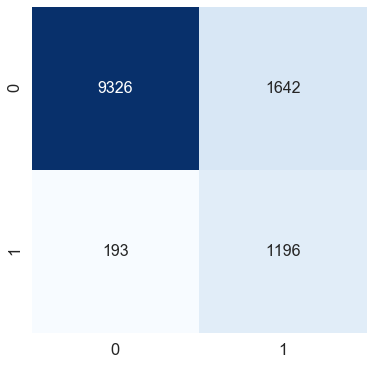

In [39]:
#Printing f1 and accuracy scores    
print('The accuracy for mode model is:', accuracy_score(y_test, y_pred))
print('The f1 score for the model model is:',f1_score(y_test, y_pred))
#Calling function 
conf_matrix(y_test, y_pred)
#recall for yes is 0.86 which is good

The accuracy for mode model is: 0.8565185724690458
The f1 score for the testing data: 0.5815435449610573


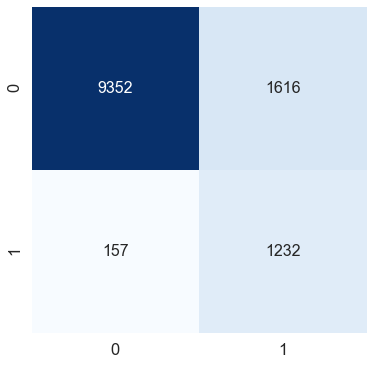

In [44]:
#Logistic model

lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train_std, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test_std)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The accuracy for mode model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)
#recall for yes is 0.88 which is better

In [46]:
#Random forest classifier
rfc=RandomForestClassifier(random_state=42,class_weight=class_weight_dict)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train_std, y_train)
pred=CV_rfc.predict(X_test_std)

The accuracy for mode model is: 0.8383911952739338
The f1 score for the model model is: 0.5631152920586304


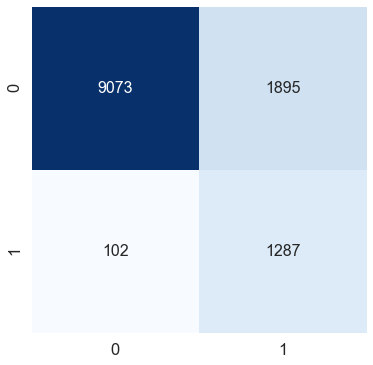

In [47]:
#Printing f1 and accuracy scores    
print('The accuracy for mode model is:', accuracy_score(y_test, pred))
print('The f1 score for the model model is:',f1_score(y_test, pred))
#Calling function 
conf_matrix(y_test, pred)
#recall for yes is 0.92 which is best

# END